In [1]:
import sys
sys.path.append('/home/kevin/Share/APEXDatasets')
from apexdsets import CTRLoader

In [76]:
loader = CTRLoader('/home/kevin/Dataset/Ads/APEXDatasets/ipinyou')
loader.unified_size

341919

In [80]:
feat_names = ['weekday', 'hour', 'IP', 'region', 'city', 'adexchange', 'domain',
                  'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
                  'creative', 'advertiser', 'useragent', 'slotprice']
feat_min = [0, 8, 33, 704998, 705034, 705405, 705411, 756732, 937427, 937449, 937464, 937476, 937481, 937613,
                937623, 937664]
feat_max = [7, 32, 704997, 705033, 705404, 705410, 756731, 937426, 937448, 937463, 937475, 937480, 937612, 937622,
                937663, 937669]
feat_sizes = [feat_max[i] - feat_min[i] + 1 for i in range(16)]

for i in range(16):
    print feat_names[i] + '\t' + str(feat_sizes[i])

weekday	8
hour	25
IP	704965
region	36
city	371
adexchange	6
domain	51321
slotid	180695
slotwidth	22
slotheight	15
slotvisibility	12
slotformat	5
creative	132
advertiser	10
useragent	41
slotprice	6


In [81]:
fin = open('/home/kevin/Documents/make-ipinyou-data/all/train.log.txt')
fields = fin.readline().strip().split('\t')
for i, f in enumerate(fields):
    print str(i) + '\t' + f

0	click
1	weekday
2	hour
3	bidid
4	timestamp
5	logtype
6	ipinyouid
7	useragent
8	IP
9	region
10	city
11	adexchange
12	domain
13	url
14	urlid
15	slotid
16	slotwidth
17	slotheight
18	slotvisibility
19	slotformat
20	slotprice
21	creative
22	bidprice
23	payprice
24	keypage
25	advertiser
26	usertag


In [82]:
cnt = 0
IPs = {}
for line in fin:
    line = line.strip().split('\t')
    ip = line[8]
    if ip in IPs:
        IPs[ip] += 1
    else:
        IPs[ip] = 1
    cnt += 1
    if cnt % 1000000 == 0:
        print cnt, len(IPs)

1000000 327666
2000000 447042
3000000 485259
4000000 520237
5000000 537965
6000000 558541
7000000 573732
8000000 585463
9000000 599832
10000000 610317
11000000 622725
12000000 629604
13000000 648260
14000000 672713
15000000 694360


In [83]:
print len(IPs)

704964


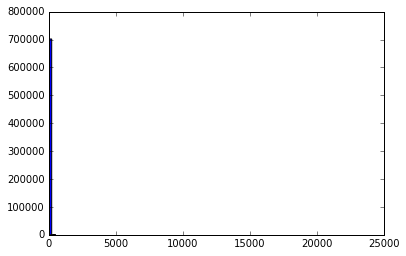

In [89]:
import matplotlib.pyplot as plt
IP_cnt = np.array(IPs.values())
index = np.where(IP_cnt > -1)[0]
plt.hist(IP_cnt[index], bins=100)
plt.show()

In [118]:
pos_index = np.where(IP_cnt > 10)[0]
print 'ratio', np.sum(IP_cnt[pos_index]) * 1.0 / np.sum(IP_cnt)
print 'dim', len(pos_index) * 1.0 / len(IP_cnt)
print 704965, '->', len(pos_index)

ratio 0.93638703554
dim 0.568841813199
704965 -> 401013


In [110]:
fin = open('/home/kevin/Documents/make-ipinyou-data/all/train.log.txt')    
cnt = 0
slotids = {}
fin.readline()
for line in fin:
    line = line.strip().split('\t')
    sid = line[15]
    if sid in slotids:
        slotids[sid] += 1
    else:
        slotids[sid] = 1
    cnt += 1
    if cnt % 1000000 == 0:
        print cnt, len(slotids)
print len(slotids)

1000000 28271
2000000 42474
3000000 54903
4000000 66518
5000000 78217
6000000 88658
7000000 98772
8000000 107495
9000000 114057
10000000 122575
11000000 130663
12000000 138489
13000000 155388
14000000 167218
15000000 177087
180694


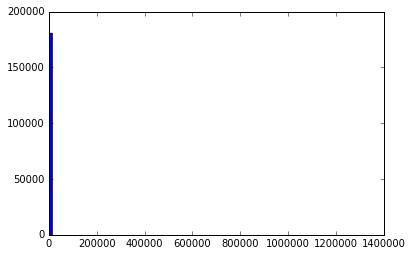

In [116]:
slotids_cnt = np.array(slotids.values())
index = np.where(slotids_cnt > -1)[0]
plt.hist(slotids_cnt[index], bins=100)
plt.show()

In [117]:
pos_index = np.where(slotids_cnt > 10)[0]
print 'ratio', np.sum(slotids_cnt[pos_index]) * 1.0 / np.sum(slotids_cnt)
print 'dim', len(pos_index) * 1.0 / len(slotids_cnt)
print 180695, '->', len(pos_index)

ratio 0.98366146251
dim 0.0991123114215
180695 -> 17909


In [18]:
loader = CTRLoader('/home/kevin/Dataset/Ads/APEXDatasets/criteo')
print loader.unified_size
# names = loader.meta('names')
sizes = loader.meta('sizes')
dtypes = loader.meta('dtypes')
for i in range(len(sizes)):
    print str(i) + '\t' + dtypes[i] + '\t' + str(sizes[i])
print sizes

1178909
0	num	None
1	cate	4389
2	cate	8000
3	cate	329
4	cate	7432
5	cate	2646
6	cate	428
7	cate	233
8	cate	6301
9	cate	295
10	cate	11
11	cate	173
12	cate	176642
13	cate	585
14	cate	147117
15	cate	19845
16	cate	14830
17	cate	6916
18	cate	18687
19	cate	4
20	cate	6646
21	cate	1272
22	cate	46
23	cate	141085
24	cate	64381
25	cate	63692
26	cate	11
27	cate	2156
28	cate	7806
29	cate	61
30	cate	5
31	cate	928
32	cate	15
33	cate	147387
34	cate	116331
35	cate	145634
36	cate	57186
37	cate	9307
38	cate	63
39	cate	34
[None, 4389, 8000, 329, 7432, 2646, 428, 233, 6301, 295, 11, 173, 176642, 585, 147117, 19845, 14830, 6916, 18687, 4, 6646, 1272, 46, 141085, 64381, 63692, 11, 2156, 7806, 61, 5, 928, 15, 147387, 116331, 145634, 57186, 9307, 63, 34]


In [3]:
train_gen = loader.data_generator('train', 1000, unified_index=False)
print(next(train_gen)[0])
print loader._offset_

[[  18  461    7 ...,   17    1    4]
 [  18   92    3 ..., 1024    1    3]
 [   0    4    0 ...,  779    7    1]
 ..., 
 [  10    2    8 ...,  101    1    2]
 [  32 2543    7 ...,  183    1    2]
 [   1    0    1 ...,   86    1    1]]
[      0    4389   12389   12718   20150   22796   23224   23457   29758
   30053   30064   30237  206879  207464  354581  374426  389256  396172
  414859  414863  421509  422781  422827  563912  628293  691985  691996
  694152  701958  702019  702024  702952  702967  850354  966685 1112319
 1169505 1178812 1178875]


In [13]:
print loader._f_.keys()
print loader._f_['train'].shape
print loader._f_['test'].shape
import h5py
print h5py.File.create_dataset.__doc__

[u'test', u'train']
(86883012, 40)
(12733031, 40)
 Create a new HDF5 dataset

        name
            Name of the dataset (absolute or relative).  Provide None to make
            an anonymous dataset.
        shape
            Dataset shape.  Use "()" for scalar datasets.  Required if "data"
            isn't provided.
        dtype
            Numpy dtype or string.  If omitted, dtype('f') will be used.
            Required if "data" isn't provided; otherwise, overrides data
            array's dtype.
        data
            Provide data to initialize the dataset.  If used, you can omit
            shape and dtype arguments.

        Keyword-only arguments:

        chunks
            (Tuple) Chunk shape, or True to enable auto-chunking.
        maxshape
            (Tuple) Make the dataset resizable up to this shape.  Use None for
            axes you want to be unlimited.
        compression
            (String or int) Compression strategy.  Legal values are 'gzip',
            '

In [17]:
print 86883012.0 / 2000000
print 12733031.0 / 2000000

43.441506
6.3665155
